# ***Project 1: Predicting Machine Downtime - The story of improving Manufacturing supply chain***

### ***See more of me on:*** 
</nav>
<a href=”www.linkedin.com/in/ngọc-diệp-nguyễn-bảo">LinkedIn</a> |
<a href=”https://github.com/NgocDiepNguyenBao>Github</a> 
</nav>

Production and manufacturing capacity is one of the most critical factors a factor manager  must handle. Each of the machines in the facility must be tuned to perfectionism, ensuring the lowest down time to maximize the production quotas.

The Project - Predicting Industrial Machine Downtime - placed me as the manager of one such factory, having to deal with a difficult problem of determining which factors caused my precious machine to break down, and how I can be ahead of the situation. 

The company has stored the machine operating data in a single table, available in `'data/machine_downtime.csv'`.

Each row in the table represents the operational data for a single machine on a given day:
- `"Date"` - the date the reading was taken on.
- `"Machine_ID"` - the unique identifier of the machine being read.
- `"Assembly_Line_No"` - the unique identifier of the assembly line the machine is located on.
- `"Hydraulic_Pressure(bar)"`, `"Coolant_Pressure(bar)"`, and `"Air_System_Pressure(bar)"` - pressure measurements at different points in the machine.
- `"Coolant_Temperature"`, `"Hydraulic_Oil_Temperature"`, and `"Spindle_Bearing_Temperature"` - temperature measurements (in Celsius) at different points in the machine.
- `"Spindle_Vibration"`, `"Tool_Vibration"`, and `"Spindle_Speed(RPM)"` - vibration (measured in micrometers) and rotational speed measurements for the spindle and tool.
- `"Voltage(volts)"` - the voltage supplied to the machine.
- `"Torque(Nm)"` - the torque being generated by the machine.
- `"Cutting(KN)"` - the cutting force of the tool.
- `"Downtime"` - an indicator of whether the machine was down or not on the given day.

In [106]:
#A quick glimpse at the data 
import pandas as pd
df = pd.read_csv('data/machine_downtime.csv')
df.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


## ***Table of content***
<br>

**Chapter 1: The cards in our hands**
- Seeing the data for the first time 
- Fill in the void - how to not get into common traps 
- Describe the data - how would a mechanic approach the situation <br>

**Chapter 2: What matters and What doesnt**
- Check for correlation - the Numbers and the Catergories 
- Things to keep <br>

**Chapter 3: Undertand the Prophecy** 
- Predictive models to the rescue - the task of Logistics Regression and RandomForestClassifier 
- Compare the models - Who is the winner ? <br> 

**Chapter 4: Preventative measures**
- What lies ahead ? The insights gained
- Supply Chain Analyst and Mechanics - the Dynamic Duo 

## ***Executive Summary***

**Key Insights** <br>
- Top 5 predictors: Torque, Cutting Force, Hydraulic Pressure, Coolant Pressure and Spindle Speed
- High torque = lower failure probability
- Random Forest outperformed logistic regression (99% vs 84%)
- Categorical features (machine ID, assembly line) showed no significant impact

**Supply Chain Relevance** <br>
- Improved Production Planning: Align maintenance windows with demand cycles
- Reduced Safety Stock: More confidence in uptime means leaner inventory
- Fewer Disruptions: Smoother material flow, better OTIF performance
- Higher Asset Utilization: Maximize equipment ROI through uptime extension

In [107]:
#Import all the neccessary libraries
import pandas as pd 
import numpy as np  
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns 
import matplotlib.pyplot as plt 
from fancyimpute import KNN
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## **CHAPTER 1** *The cards in our hands*

*Seeing the data for the first time*

Alongside general info such as the Date measured, Unique Machine_Id and Assembly_Line_No, **the other features of the machine can be break down into:** 

1. Power and Energy Systems: <br>
- Involving Voltage(volts), Torque(Nm), Spindle_Speed (RPM) - the foundation of the power that the machine needs to operate first hand 

2. Fluid Systems (Use for lubrication, cooling, actuation) <br>
- Things like Hydraulic Pressure, Coolant Pressure, Air System Pressure, Coolant Temperature, Hydraulic Oil Temperature

3. Mechanical Health - aim to ensure machine structure while operating <br>
- Spindle Bearing Temp, Spindle Vibration, Tool vibration 

4. Cutting and End Process Performance - ensuring productivity <br>

**It might be beneficial for us to analyse the correlation between the features, pay attention to ones that are in group, to see the connection between them and to the target valuable**

In [108]:
df.info()
df[df.isna().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         2500 non-null   object 
 1   Machine_ID                   2500 non-null   object 
 2   Assembly_Line_No             2500 non-null   object 
 3   Hydraulic_Pressure(bar)      2490 non-null   float64
 4   Coolant_Pressure(bar)        2481 non-null   float64
 5   Air_System_Pressure(bar)     2483 non-null   float64
 6   Coolant_Temperature          2488 non-null   float64
 7   Hydraulic_Oil_Temperature    2484 non-null   float64
 8   Spindle_Bearing_Temperature  2493 non-null   float64
 9   Spindle_Vibration            2489 non-null   float64
 10  Tool_Vibration               2489 non-null   float64
 11  Spindle_Speed(RPM)           2494 non-null   float64
 12  Voltage(volts)               2494 non-null   float64
 13  Torque(Nm)        

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
128,29-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,134.981845,5.674679,6.655508,26.5,51.7,35.3,0.908,NaN,22734.0,352.0,20.999472,2.88,No_Machine_Failure
155,28-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,112.430664,5.128736,NaN,21.6,40.5,31.4,1.075,28.592,20624.0,340.0,23.147886,1.89,No_Machine_Failure
213,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,123.492670,5.563162,6.265352,12.2,NaN,40.3,0.415,NaN,14266.0,321.0,21.412002,3.02,No_Machine_Failure
216,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,137.617864,5.544234,NaN,25.5,48.2,35.4,0.767,23.723,14266.0,320.0,32.370456,1.99,No_Machine_Failure
266,27-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,77.200000,4.650913,7.119539,22.6,43.0,35.1,0.839,26.218,18784.0,404.0,NaN,2.57,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,95.714928,3.888835,NaN,4.5,NaN,34.5,0.758,38.343,22032.0,281.0,21.668573,3.16,No_Machine_Failure
2453,01-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,127.951375,NaN,6.387363,24.6,35.8,34.8,1.774,25.390,21880.0,382.0,31.620335,1.87,No_Machine_Failure
2458,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,113.021660,3.888835,6.463824,24.8,49.3,36.5,0.182,NaN,21981.0,360.0,31.521075,1.88,No_Machine_Failure
2461,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,NaN,5.425502,6.155373,24.3,50.1,33.8,0.849,27.087,17726.0,351.0,21.975787,1.91,No_Machine_Failure


### ***Fill in the void - how to not get into common traps***

With some features having null values, we must tackle that by using some type of impute or dropping techniques. ***Let's first take a look at the missing values portion of the data.*** 

In [109]:
missing_values = df.isna().mean() * 100
missing_values = pd.DataFrame(missing_values)
display(missing_values.index)
display(missing_values)

#With the amount of missing values only be less than 1%, we can try 
#with SimpleImpute or KNN as the appropriate technique.  

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature',
       'Spindle_Bearing_Temperature', 'Spindle_Vibration', 'Tool_Vibration',
       'Spindle_Speed(RPM)', 'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)',
       'Downtime'],
      dtype='object')

,0
Date,0.00
Machine_ID,0.00
Assembly_Line_No,0.00
Hydraulic_Pressure(bar),0.40
Coolant_Pressure(bar),0.76
Air_System_Pressure(bar),0.68
Coolant_Temperature,0.48
Hydraulic_Oil_Temperature,0.64
Spindle_Bearing_Temperature,0.28
Spindle_Vibration,0.44


>We decided to go with the **KNN imputation method**, as it is more suitable for this type of lesser rows datasets, and ensure to keep the pattern of missing values (if any)

In [110]:
#Take the index of missing values columns
index = [ 'Hydraulic_Pressure(bar)','Coolant_Pressure(bar)', 'Air_System_Pressure(bar)','Coolant_Temperature', 'Hydraulic_Oil_Temperature',
       'Spindle_Bearing_Temperature', 'Spindle_Vibration', 'Tool_Vibration',
       'Spindle_Speed(RPM)', 'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)']
df_impute = df[index]
#Impute using the number of number as 5 
imputor = KNN(k = 5)
df_impute = imputor.fit_transform(X = df_impute)
display(df_impute.shape)
#Combine the imputed data with the completed data
df[index] = df_impute
#Check again for any null
df.isnull().sum()

c:\Users\Ngọc Diệp\OneDrive\Máy tính\Data\visual\.funny\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\Ngọc Diệp\OneDrive\Máy tính\Data\visual\.funny\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\Ngọc Diệp\OneDrive\Máy tính\Data\visual\.funny\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Imputing row 1/2500 with 0 missing, elapsed time: 0.718
Imputing row 101/2500 with 0 missing, elapsed time: 0.718
Imputing row 201/2500 with 0 missing, elapsed time: 0.718
Imputing row 301/2500 with 0 missing, elapsed time: 0.723
Imputing row 401/2500 with 0 missing, elapsed time: 0.723
Imputing row 501/2500 with 0 missing, elapsed time: 0.723
Imputing row 601/2500 with 0 missing, elapsed time: 0.724
Imputing row 701/2500 with 0 missing, elapsed time: 0.724
Imputing row 801/2500 with 0 missing, elapsed time: 0.724
Imputing row 901/2500 with 1 missing, elapsed time: 0.725
Imputing row 1001/2500 with 0 missing, elapsed time: 0.725
Imputing row 1101/2500 with 0 missing, elapsed time: 0.725
Imputing row 1201/2500 with 0 missing, elapsed time: 0.725
Imputing row 1301/2500 with 0 missing, elapsed time: 0.726
Imputing row 1401/2500 with 0 missing, elapsed time: 0.726
Imputing row 1501/2500 with 0 missing, elapsed time: 0.726
Imputing row 1601/2500 with 0 missing, elapsed time: 0.726
Imputing 

(2500, 12)

Date                           0
Machine_ID                     0
Assembly_Line_No               0
Hydraulic_Pressure(bar)        0
Coolant_Pressure(bar)          0
Air_System_Pressure(bar)       0
Coolant_Temperature            0
Hydraulic_Oil_Temperature      0
Spindle_Bearing_Temperature    0
Spindle_Vibration              0
Tool_Vibration                 0
Spindle_Speed(RPM)             0
Voltage(volts)                 0
Torque(Nm)                     0
Cutting(kN)                    0
Downtime                       0
dtype: int64

In [111]:
#Check the statistical summary of the dataset again
df.describe()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,101.443857,4.942666,6.498823,18.553068,47.618690,35.068510,1.009019,25.416850,20274.437140,349.001771,25.239938,2.782009
std,30.241869,0.996098,0.406361,8.541192,3.760511,3.761496,0.342377,6.427276,3848.511577,45.341063,6.121086,0.616102
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.470719,4.460612,6.218362,10.400000,45.100000,32.500000,0.777000,21.092750,17919.000000,319.000000,21.696886,2.250000
50%,96.905000,4.930181,6.504600,21.200000,47.700000,35.100000,1.007577,25.465500,20137.500000,349.000000,24.664290,2.770000
75%,126.383134,5.512482,6.779626,25.600000,50.100000,37.600000,1.234250,29.790000,22489.750000,380.000000,30.514008,3.262500
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


In [112]:
df.nunique()

Date                            164
Machine_ID                        3
Assembly_Line_No                  3
Hydraulic_Pressure(bar)        1987
Coolant_Pressure(bar)          1647
Air_System_Pressure(bar)       2489
Coolant_Temperature             287
Hydraulic_Oil_Temperature       225
Spindle_Bearing_Temperature     211
Spindle_Vibration              1155
Tool_Vibration                 2361
Spindle_Speed(RPM)             1186
Voltage(volts)                  244
Torque(Nm)                     1348
Cutting(kN)                     177
Downtime                          2
dtype: int64

In [113]:
df['Machine_ID'] = df['Machine_ID'].replace({'Makino-L1-Unit1-2013': 'L1-2013', 
                                             'Makino-L3-Unit1-2015':'L3-2015', 
                                             'Makino-L2-Unit1-2015':'L2-2015'})

>From preliminary exam of the data, we can see the the assembly line information is also showned in the Machine Id, and there is only Unit1. We can safely convert the Machine_ID info to more eligible format

***Now that the dataset has been cleaned***, let's step into understanding the numericals and categoricals values of the machine. What does and does not needs to be examine in this? 

### ***Describe the data - how would a mechanic approach the situation***

In [114]:
fig = px.histogram(df, x ='Machine_ID', color= 'Downtime', barmode='group')
fig

> ***Overall:*** 
<br> 
The L1-2013 machine is the one with the **highest amount of failure sightings**. Both of the 2015 model showed lower machine failure rate, especially for the machine in L2, where the amount of machine failure is lower than normal machine operations. 

In [115]:
#Sectioning the numerical values and categorical values of df
numerical = ['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)',
       'Air_System_Pressure(bar)', 'Coolant_Temperature',
       'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature',
       'Spindle_Vibration', 'Tool_Vibration', 'Spindle_Speed(RPM)',
       'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)']
categorical = ['Machine_ID', 'Assembly_Line_No']

numerical_values  = df[numerical]
categorical_values = df[categorical]
numerical_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Hydraulic_Pressure(bar)      2500 non-null   float64
 1   Coolant_Pressure(bar)        2500 non-null   float64
 2   Air_System_Pressure(bar)     2500 non-null   float64
 3   Coolant_Temperature          2500 non-null   float64
 4   Hydraulic_Oil_Temperature    2500 non-null   float64
 5   Spindle_Bearing_Temperature  2500 non-null   float64
 6   Spindle_Vibration            2500 non-null   float64
 7   Tool_Vibration               2500 non-null   float64
 8   Spindle_Speed(RPM)           2500 non-null   float64
 9   Voltage(volts)               2500 non-null   float64
 10  Torque(Nm)                   2500 non-null   float64
 11  Cutting(kN)                  2500 non-null   float64
dtypes: float64(12)
memory usage: 234.5 KB


In [116]:
#Get the dummies value for Downtime - Machine_Failure = 0
df = pd.get_dummies(df, columns = ['Downtime'], drop_first= True, dtype= int)
df.rename(columns={'Downtime_No_Machine_Failure':'Downtime'}, inplace= True) #Replace the column name for easy access
df.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,L1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,0
1,31-12-2021,L1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,0
2,31-12-2021,L3-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,0
3,31-05-2022,L2-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,0
4,31-03-2022,L1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,0


In [117]:
#Make suplots to show the distribution of numerical values
fig = make_subplots(rows = 3, cols = 4, subplot_titles = numerical)
cols = 4 
rows = 3
# Loop to add plots
for i, name in enumerate(numerical):
    row = i // cols + 1
    col = i % cols + 1
    
    # Example plot: random line
    y = df[name]
    
    fig.add_trace(
        go.Box(y=y, x = df['Machine_ID'], name=name,boxpoints='all', 
        jitter=0.3, 
        pointpos=-1.8),  
        row=row,
        col=col,  
       
    )

# Update layout
fig.update_layout(
    height=300*rows,  # Adjust height based on number of rows
    width=1200,
    title_text="Box Plot of Numerical Values",
    showlegend=False,
)

fig.show()

>Divided by the different models of the machine, we can clearly see that among the features, not a lot of variation appeared. ***Specifically, only Hydraulic_Pressure(Bar) has a significant difference among the three models.*** 
<br>

>We can interpreted this as there are **not many differences in features performance of among the three models***. Deeper analysis of the categorical values may shed more light on this. 

In [118]:
#Create a df with Date as datetime type 
df_date = df.copy()
df_date['Date'] = pd.to_datetime(df_date['Date'])
avg_over_time = df_date.groupby('Date')[numerical].mean().reset_index()

fig = make_subplots(rows = 3, cols = 4, subplot_titles = numerical)
cols = 4 
rows = 3
# Loop to add plots
for i, name in enumerate(numerical):
    row = i // cols + 1
    col = i % cols + 1
    
    # Example plot: random line
    y = avg_over_time[name]
    fig.add_trace(
        go.Scatter(y=y, x = avg_over_time['Date'], name=name, mode ='lines'),  
        row=row,
        col=col, 
    
    )


# Update layout
fig.update_layout(
    height=300*rows,  # Adjust height based on number of rows
    width=1200,
    title_text="Box Plot of Numerical Values",
    showlegend=False,
)

fig.show()

C:\Users\Ngọc Diệp\AppData\Local\Temp\ipykernel_17132\3109198784.py:3: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



>The line graph demonstrated the fixed nature of the numerical features - **none out of the 12 features have a strong fluctuation over time.** This can imply that datetime does not directly affect the characteristics of the machines, leading to not affecting the machine downtime. 

***Therefore, we decided to not consider 'Date' as a feature, in order to simplify the Machine Learning process.*** 

# **CHAPTER 2: WHAT DOES AND WHAT DOESN'T MATTER**

## ***Check for correlation - the Numbers and the Categories*** 

> ***In order to determine the inter-relationship of the numerical values, we must examine their Pearson correlation. According to our heatmap, two things can be inferred:*** 
> - Take 0.7 as the threshold for interdependence, **none of the numerical features are related to each other.** 
> - Examining the impact of each features for Downtime, ***notable features such as Torque or Hydraulic_Pressure has the highest correlation to Downtime***, which means we can expect some of this effect to translate into the model. 

In [119]:
numerical_corr = pd.concat([df[numerical], df['Downtime']], axis=1)
corr_num = numerical_corr.corr().round(3)
fig = px.imshow(
    corr_num,
    text_auto=True,    
    color_continuous_scale='Viridis',  
    aspect="auto",        
)

# Update layout for better readability
fig.update_layout(
    width=800,
    height=700,
    xaxis_title="",
    yaxis_title="",
    xaxis_tickangle=45,    
    font=dict(size=12))

In terms of the categorical values, we approach examining its impact on Downtime by **using Chi-square analysis**. Take 0.05 as the alppha value, we can see that both p-values of Machine Id and Assembly_Line_No is much larger than 0.05, which means ***the two categorical values play no significant role in determining the outcome of Downtime.***  

In [120]:
#Initiate Chi-square analysis to determine the correlation between 

machine_id_corr = pd.crosstab(df['Machine_ID'], df['Downtime'])
from scipy.stats import chi2_contingency
chi2_mac, p_mac, dof, expected = chi2_contingency(machine_id_corr)

print('Chi2 Statistic of Machine Id:', chi2_mac)
print('p-value of Machine Id:', p_mac)

assemby_line_no = pd.crosstab(df['Assembly_Line_No'], df['Downtime'])
chi2_line, p_line, dof, expected = chi2_contingency(assemby_line_no)
print('Chi2 Statistic of Assembly_Line_No:', chi2_line)
print('p-value of Assembly_Line_No', p_line)

Chi2 Statistic of Machine Id: 1.4557348910395889
p-value of Machine Id: 0.48293778385555275
Chi2 Statistic of Assembly_Line_No: 1.4557348910395889
p-value of Assembly_Line_No 0.48293778385555275


## ***Conclusion: Things to keep*** 
> - ***Numerical values***: None of the numerical values are interrelated, and all demonstrated either positive or negative correlation to Downtime , which means we can proceed with all of them for the machine learning segment - and expect to get further insights ! <br>
> - ***Categorical values***: Both categorical features have no impact on Downtime. Therefore, we would drop these two columns in order to simplify our models. <br>

# **Chapter 3: Understand the Prophecy**

Before getting to see the power to predict the future, we must separate the dataset into test set and train set, as well as features and target values.

## ***Predictive models to the rescue - the task of Logistics Regression and RandomForestClassifier***

In [121]:
#Separating the X and Y values
X = df.drop(columns =['Downtime', 'Date','Machine_ID', 'Assembly_Line_No']) #Drop the necessary columns 
y = df['Downtime']

scale = StandardScaler() #Decided to scale the values as each characteristics are on a different scale
X_scaled = scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,random_state=156)

In [122]:
#As this is Binary Classification, we must try Logistic Regression as the first model
lg = LogisticRegression(random_state = 156)
lg.fit(X_train, y_train)
y_pred_lg = lg.predict(X_test)

In [123]:
#For a more advanced model, we opted for RandomForestClassifier 
rf = RandomForestClassifier(random_state = 156, max_features='sqrt')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [124]:
print('Logistic Regression classification report', classification_report(y_test, y_pred_lg))
print('Random Forest Classifier', classification_report(y_test, y_pred_rf))

Logistic Regression classification report               precision    recall  f1-score   support

           0       0.85      0.83      0.84       374
           1       0.84      0.85      0.84       376

    accuracy                           0.84       750
   macro avg       0.84      0.84      0.84       750
weighted avg       0.84      0.84      0.84       750

Random Forest Classifier               precision    recall  f1-score   support

           0       0.99      0.99      0.99       374
           1       0.99      0.99      0.99       376

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



## ***Compare the models - Who is the winner ?***
> The classification report clearly showed the power of the RandomForest model. While LogisticRegression scored only 84% of accuract, ***the RandomForestClassification reached almost 99%***. Therefore, it would be more advisible to take the prediction of the RandomForestClassifier

In [125]:
#Initiate the conufusion matrix to get a clearer view of the predictions
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm, index=["Actual MD", "Actual NMD"], columns=["Predicted MD", "Predicted NMD"])

# Plot heatmap
fig = px.imshow(cm_df,
                text_auto=True,
                color_continuous_scale='Blues',
                title="Confusion Matrix")
fig.show()

***Now that we know the model is good for predicting the Downtime of the machine, let's dive deeper into the result - feature importance to know which of the features are contributing the most to the chance of machine being defective.*** 

# **Chapter 4: Preventative measures**

##  ***What lies ahead ? The insights gained***

In [ ]:
features = rf.feature_importances_
feature_names = X.columns  

# Create a DataFrame for plotting
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': features
}).sort_values(by='Importance', ascending=False)

# Create the bar plot
fig = px.bar(feat_importance_df, x='Importance', y='Feature', orientation='h',
             title='Feature Importance from Random Forest')
fig.show()

feat_importance_df

,Feature,Importance
10,Torque(Nm),0.271188
0,Hydraulic_Pressure(bar),0.223028
11,Cutting(kN),0.219773
1,Coolant_Pressure(bar),0.134472
8,Spindle_Speed(RPM),0.072393
3,Coolant_Temperature,0.025610
7,Tool_Vibration,0.010157
6,Spindle_Vibration,0.009646
5,Spindle_Bearing_Temperature,0.009510
4,Hydraulic_Oil_Temperature,0.008681


In [131]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf, X_test, y_test, n_repeats = 20, random_state= 156)

importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean, 
}).sort_values('Importance', ascending= False)

display(importances_df)
fig = px.bar(importances_df, x='Importance', y='Feature', orientation='h',
             title='Feature Importance from  Permutation Importance')
fig.show()




,Feature,Importance
10,Torque(Nm),0.162200
11,Cutting(kN),0.129200
1,Coolant_Pressure(bar),0.035600
8,Spindle_Speed(RPM),0.028867
0,Hydraulic_Pressure(bar),0.019733
4,Hydraulic_Oil_Temperature,0.000933
3,Coolant_Temperature,0.000733
9,Voltage(volts),0.000133
7,Tool_Vibration,-0.000533
5,Spindle_Bearing_Temperature,-0.001000


> Although the result of the built-in feature importance of the model and the extra permutation feature is a bit different, we can see that: 
> - The **top 5 most important features is the same, including**: Torque(Nm), Hydraulic_Pressure(bar), Cutting(kN), Coolant_Pressure(bar), and Spindle_Speed(RPM).  
> - The problem is likely to lie with the Power System, the fluid system and the Cutting and End processing 
> - Permutation Importance showcased the impact of these features in real-life scenario, which means it can be more reliable. 
> - **Torque is the most impportant feature - as it the metrics in the machine power systems** 

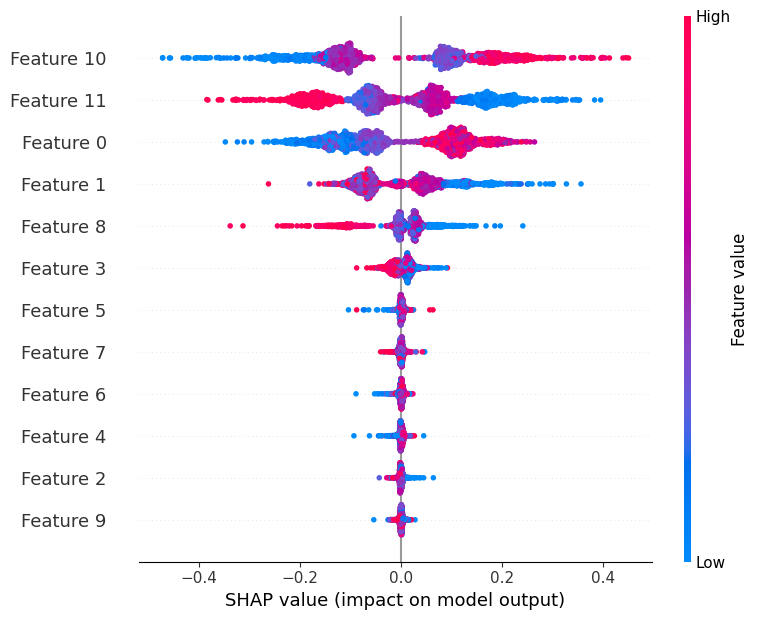

In [128]:
import shap
X_train_df = pd.DataFrame(X_train, columns=numerical)
# create TreeExplainer
explainer = shap.Explainer(rf)

# get SHAP values
shap_values = explainer(X_train)

# Step 2: Plot
shap.summary_plot(shap_values[:,:,1], X_train)


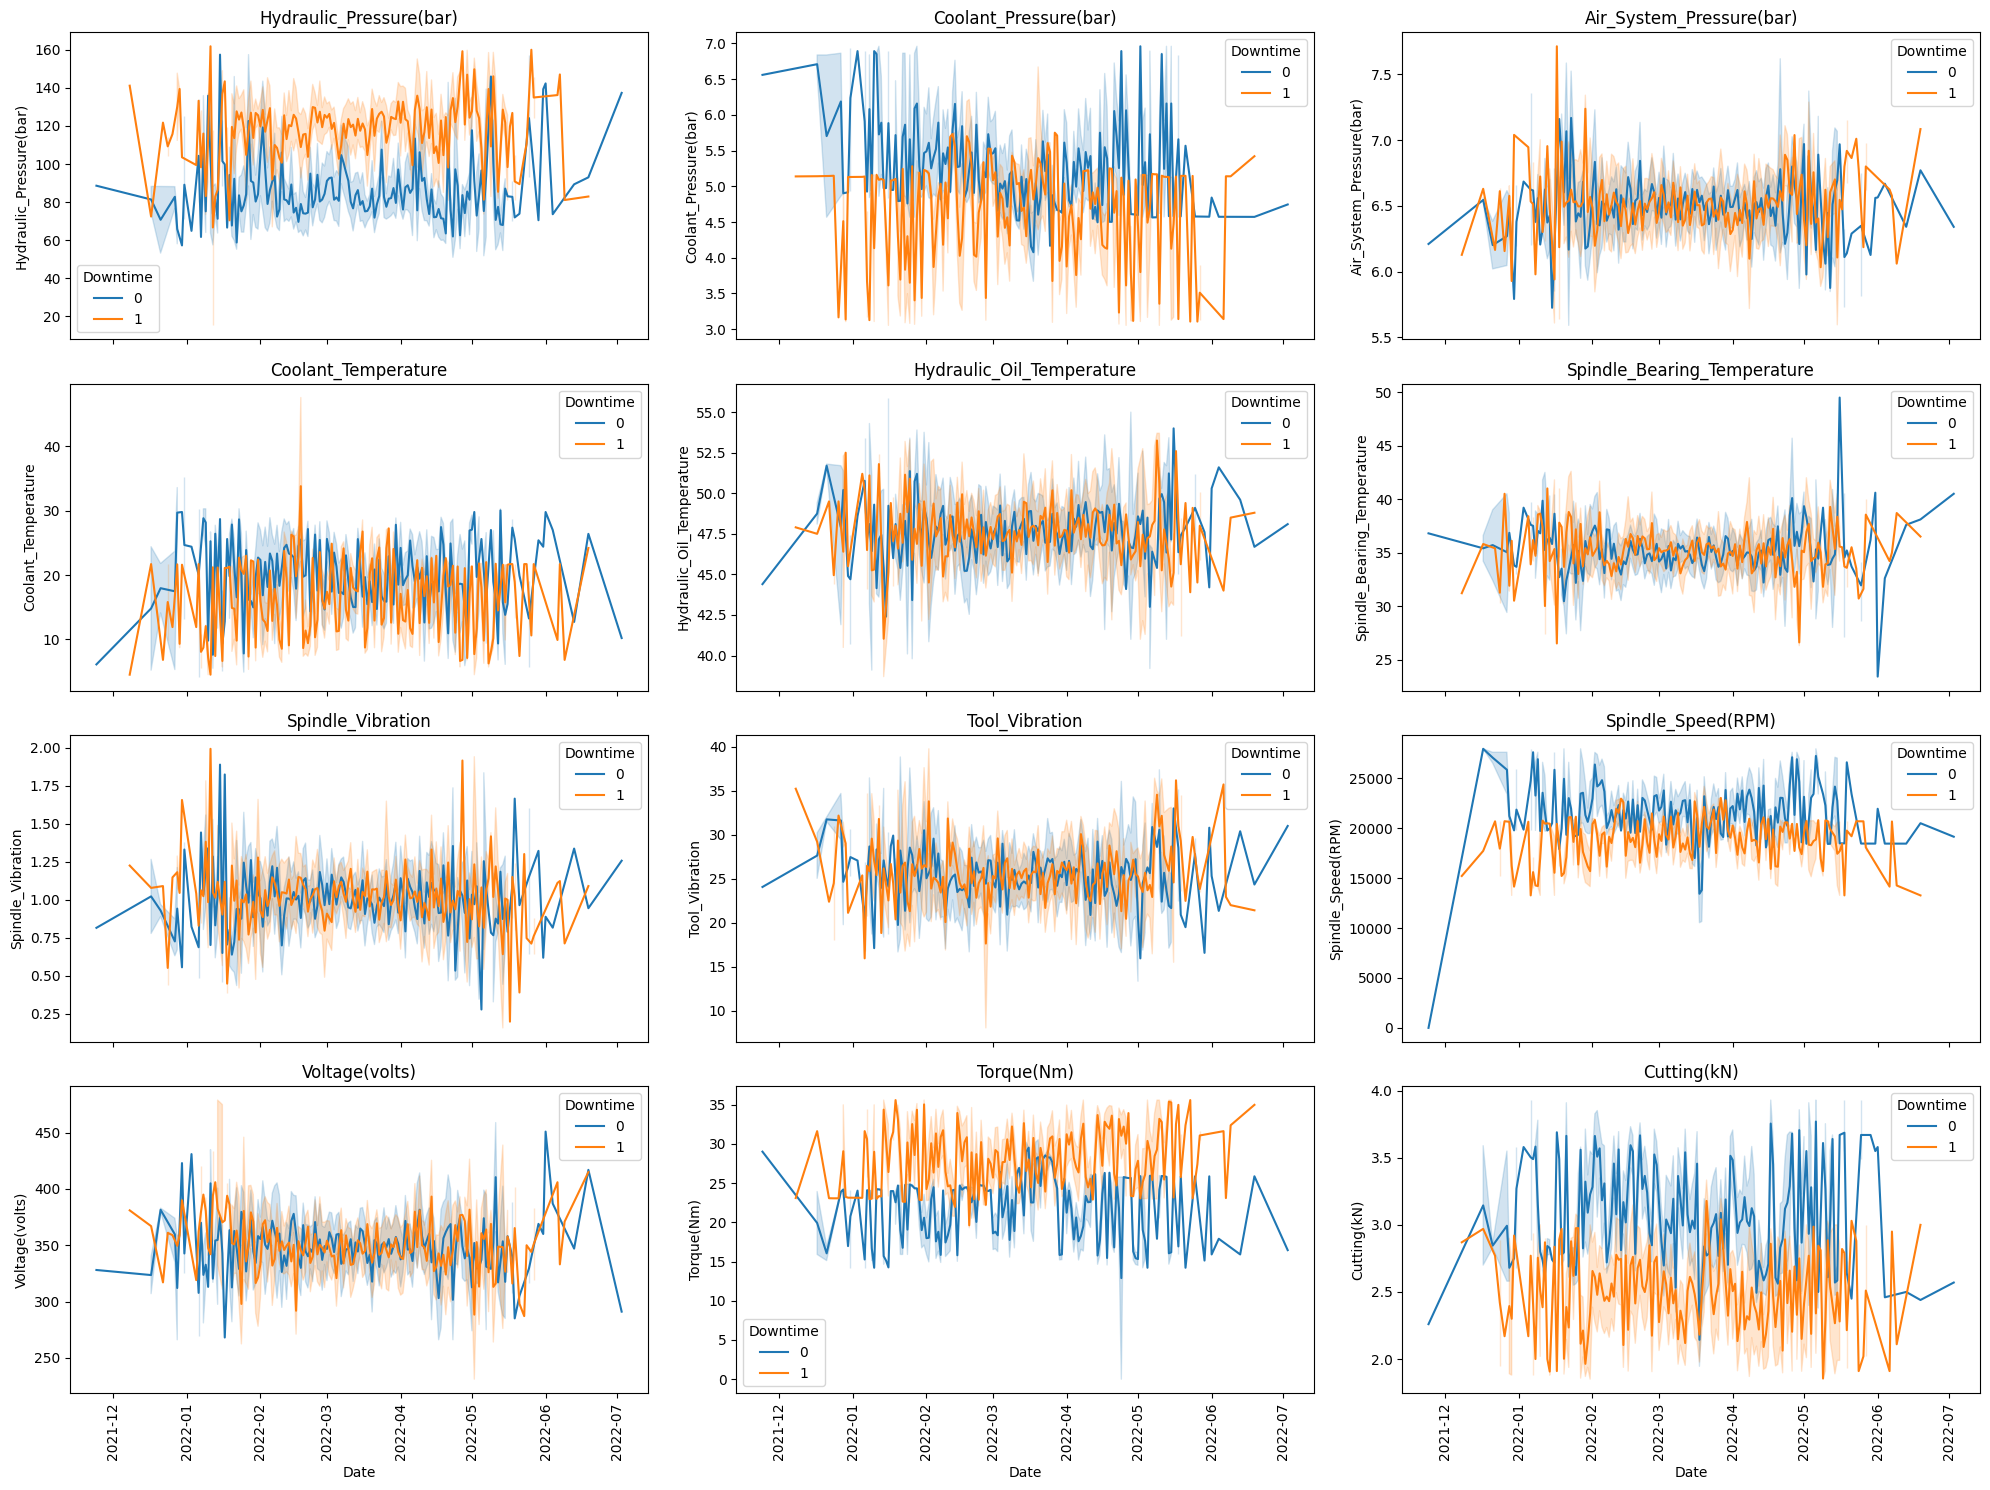

In [129]:
# Create 12 subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15), sharex=True)
axes = axes.flatten()  # flatten to 1D list for easy indexing

for i, col in enumerate(numerical[:12]):  # ensure only 12 plots
    sns.lineplot(data=df_date, x='Date', y=col, hue='Downtime', ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()

> ***Lastly, we utilized SHAP and Line plot visualization to show the direction of the top five features' impact on machine Downtime.*** <br>
> **SHAP summary plot and Line Plot clearly displayed the trend that:** 
> <br>
    1. **Torque**: The higher the value of Torque, the more likely that the machine will not encountered problems  <br>
    2. **Cutting**: The lower the value of Cutting, the more likely that the machine will not encountered problems <br>
    3. **Hydraulic_Pressure(bar)**:The higher the value of Torque, the more likely that the machine will not encountered problems <br>
    4. **Coolant_Pressure(bar)**:The lower the value of Cutting, the more likely that the machine will not encountered problems <br>
    5. **Spindle_Speed(RPM)**: 	The lower the value of Cutting, the more likely that the machine will not encountered problems <br>

## ***Supply Chain Analyst and Mechanics - the Dynamic Duo***

> Now that we got the insights, how can we translate these valuable information to directly protect our supply chain: 

> 1. **Work in tandem with the mechanics**:
> 1.1. Deploy signalling tactics: We must work with the engineers to ensure a threshold for each of the 5 importance features, and deploy a type of signalling recognizer to <br>
> 1.2. Ensure periodical maintenance: Check up and maintain the machines through different periods can be helpful in understanding clearer why the machine suffer from so much downtime. <br>
> 2. **Prepare buffer stock**: Using buffer stock to ensure that even if the machine go down, the production quota is still available when help prevent unpredictable stock-outs <br>
> 3. **Prepare back up machinery**: Investing in back-up machinery that can perform the same function, so even during the machine downtime production can continue. 